In [4]:
DATA_PATH = "./data/fish.csv"

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
dataframe = pd.read_csv(DATA_PATH)
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [44]:
dataframe.sum()

Species    BreamBreamBreamBreamBreamBreamBreamBreamBreamB...
Weight                                               63333.9
Length1                                               4173.3
Length2                                               4518.1
Length3                                               4965.1
Height                                               1426.39
Width                                                 702.38
dtype: object

In [8]:
dataframe.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

In [9]:
dataframe.mean()

Weight     398.326415
Length1     26.247170
Length2     28.415723
Length3     31.227044
Height       8.970994
Width        4.417486
dtype: float64

In [11]:
dataframe.min()

Species     Bream
Weight          0
Length1       7.5
Length2       8.4
Length3       8.8
Height     1.7284
Width      1.0476
dtype: object

In [12]:
dataframe.max()

Species    Whitefish
Weight          1650
Length1           59
Length2         63.4
Length3           68
Height        18.957
Width          8.142
dtype: object

<AxesSubplot:>

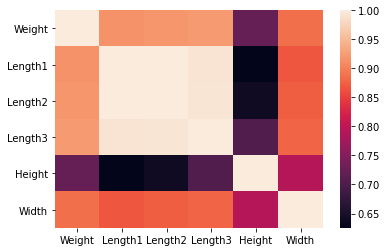

In [13]:
sns.heatmap(dataframe.corr())

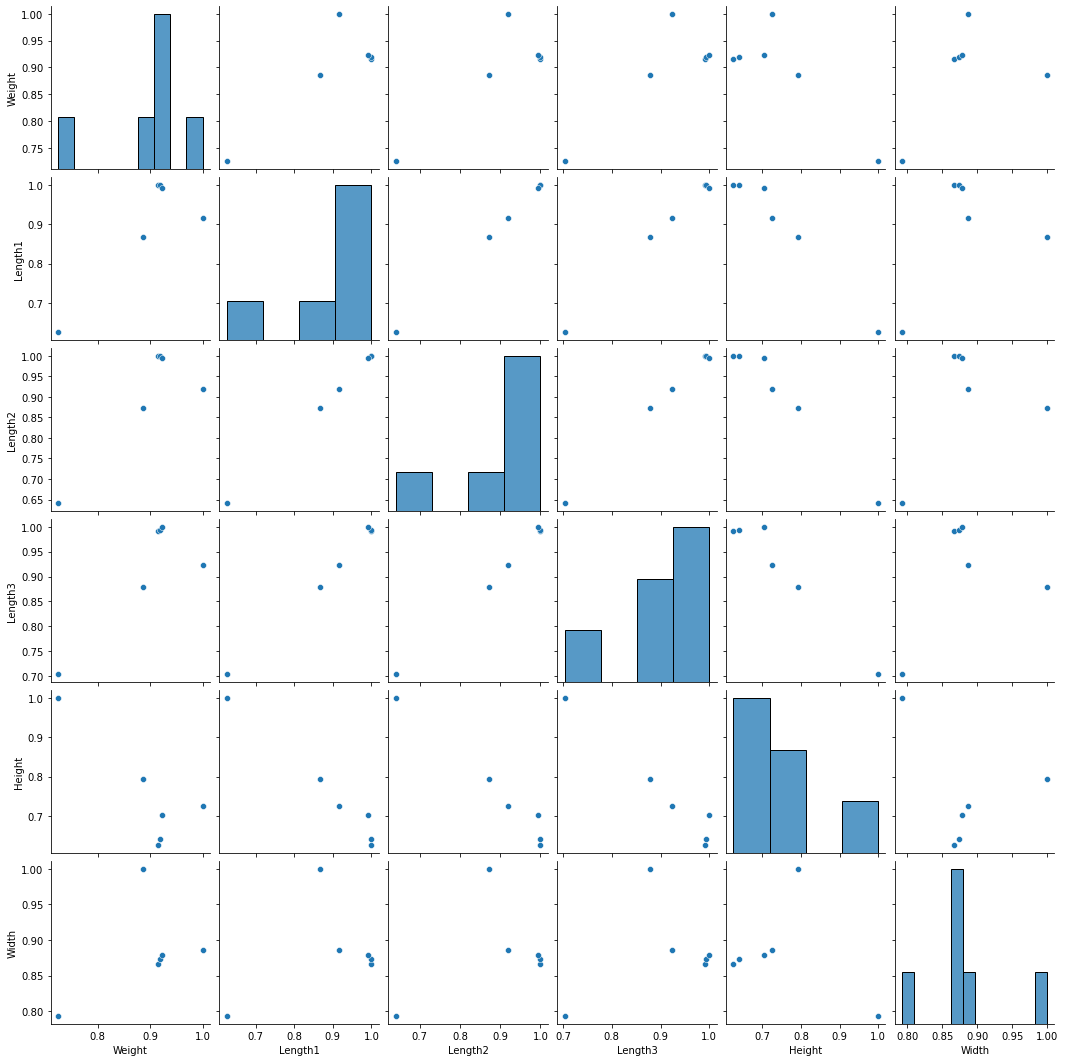

In [14]:
sns.pairplot(dataframe.corr())

In [100]:
dataframe['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [93]:
# from sklearn.preprocessing import  OneHotEncoder,LabelEncoder
# l_enc = LabelEncoder()
# encodes = l_enc.fit_transform(dataframe['Species'])
# onehotEncoder = OneHotEncoder()
# enc_df = pd.DataFrame(onehotEncoder.fit_transform(dataframe[['Species']].values.reshape(-1,1)))

In [105]:
species_df= pd.get_dummies(dataframe['Species'])
species_df.head(4)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0


In [107]:
df = pd.concat([dataframe,species_df],axis =1).drop('Species',axis=1)

In [108]:
df.head(89)

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,125.0,19.0,21.0,22.5,5.6925,3.6675,0,0,1,0,0,0,0
85,130.0,19.3,21.3,22.8,6.3840,3.5340,0,0,1,0,0,0,0
86,120.0,20.0,22.0,23.5,6.1100,3.4075,0,0,1,0,0,0,0
87,120.0,20.0,22.0,23.5,5.6400,3.5250,0,0,1,0,0,0,0


In [110]:
Y = df['Weight'].values
X = df.drop('Weight',axis=1).values

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
len(x_test)

32

In [115]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression( normalize=True)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test) 

0.9102350316202588

In [117]:
y_pred = regressor.predict(x_test)
y_pred

array([ 428.88533577,   98.08363614,  216.67998922,  208.66936638,
        657.24094116,  876.38855413,  665.97861965,  407.27203048,
        965.65306863,  146.62291102,  255.15532231,  561.63685124,
        765.67575361, 1012.38234027, -118.72798063,   14.47341216,
        137.60789564, 1155.53572308,  170.97092949,  724.93548455,
       -128.48675188,  525.45508599,  175.3519065 , 1322.74816983,
        -23.0873263 ,  475.44172778,  719.96841977,  280.94571114,
        885.12085107,  -16.63412226,  585.26038657,  164.22863371])

In [121]:
regressor.predict(np.array([[32,54,4,78,2,1,0,0,0,0,0,0]]))[0]

3512.2611665037844

In [122]:
#Saving model
import os
import joblib


def save_model(model,model_path,filename):
    if not os.path.exists(model_path):
        os.mkdir(model_path)
    joblib.dump(model,os.path.join(model_path,filename))

In [123]:
MODEL_DIR = "model"
save_model(regressor,MODEL_DIR,'regressor.pkl')